# Breast Cancer

This data is taken from Breast Cancer Wisconsin (Diagnostic) Data Set.
In this dataset we did visualisation, analysis, data cleaning and fitting the currect model for prediction purposes.

Importing some basic python libraries and analysing of data.

In [1]:
import pandas as pd
import numpy as np

#reading csv file
data=pd.read_csv('F:/Study/data.csv',header=0,index_col=None)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#removing columns which give no infprmation about the data and the output column is stored at another place 
y = data.diagnosis                          
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#looking if there's some missing values
print(x.count(),y.count())

radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64 569


In [4]:
#basic analysis of data
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Now we do basic visualisation and the visualisation thatwould help in feature elemination.

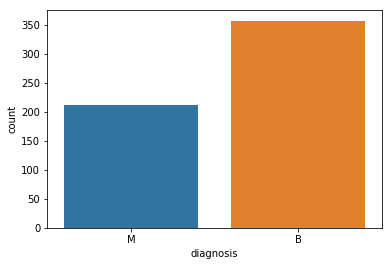

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
s=sns.countplot(y,label='count')

In [6]:
B, M = y.value_counts()
print("benign",B)
print("malignant",M)

benign 357
malignant 212


Violin plot 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

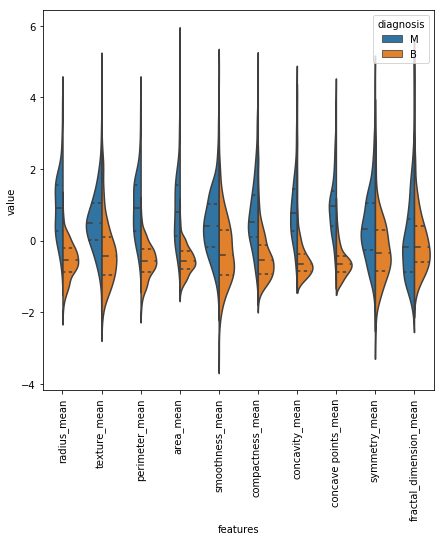

In [7]:
%matplotlib inline 
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())    #standardise          
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(7,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

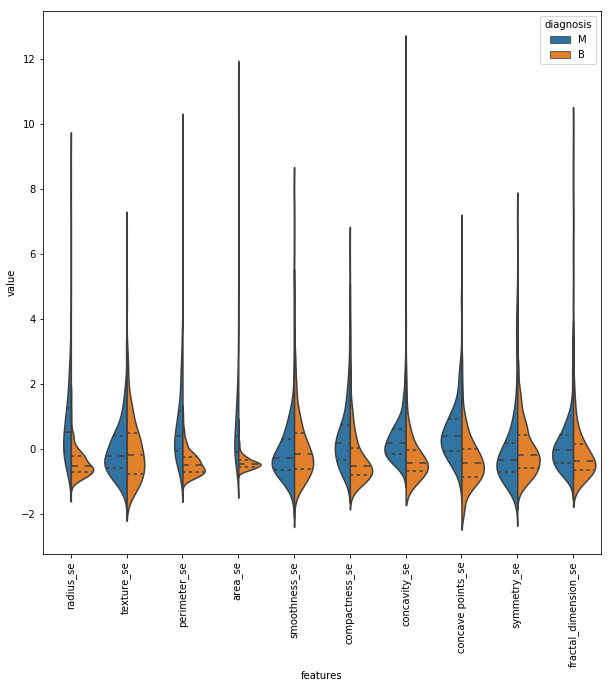

In [8]:
%matplotlib inline
data= pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

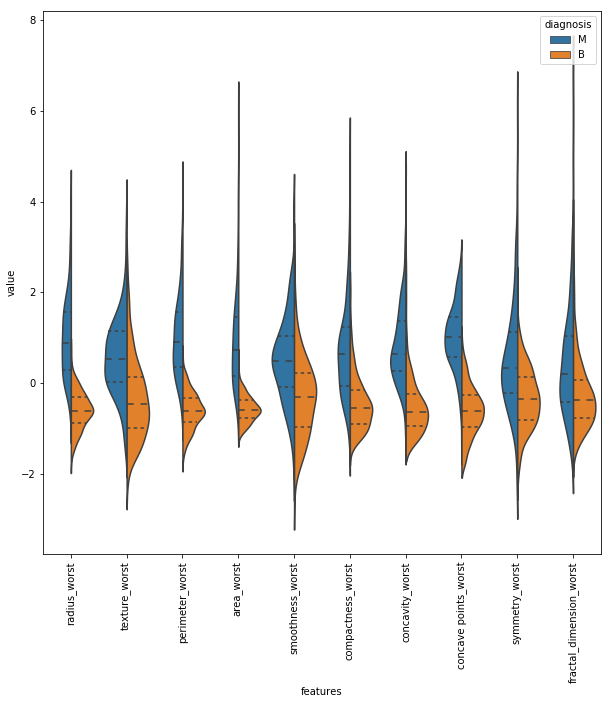

In [9]:
%matplotlib inline
data= pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Heat map - to see the correlation between different features

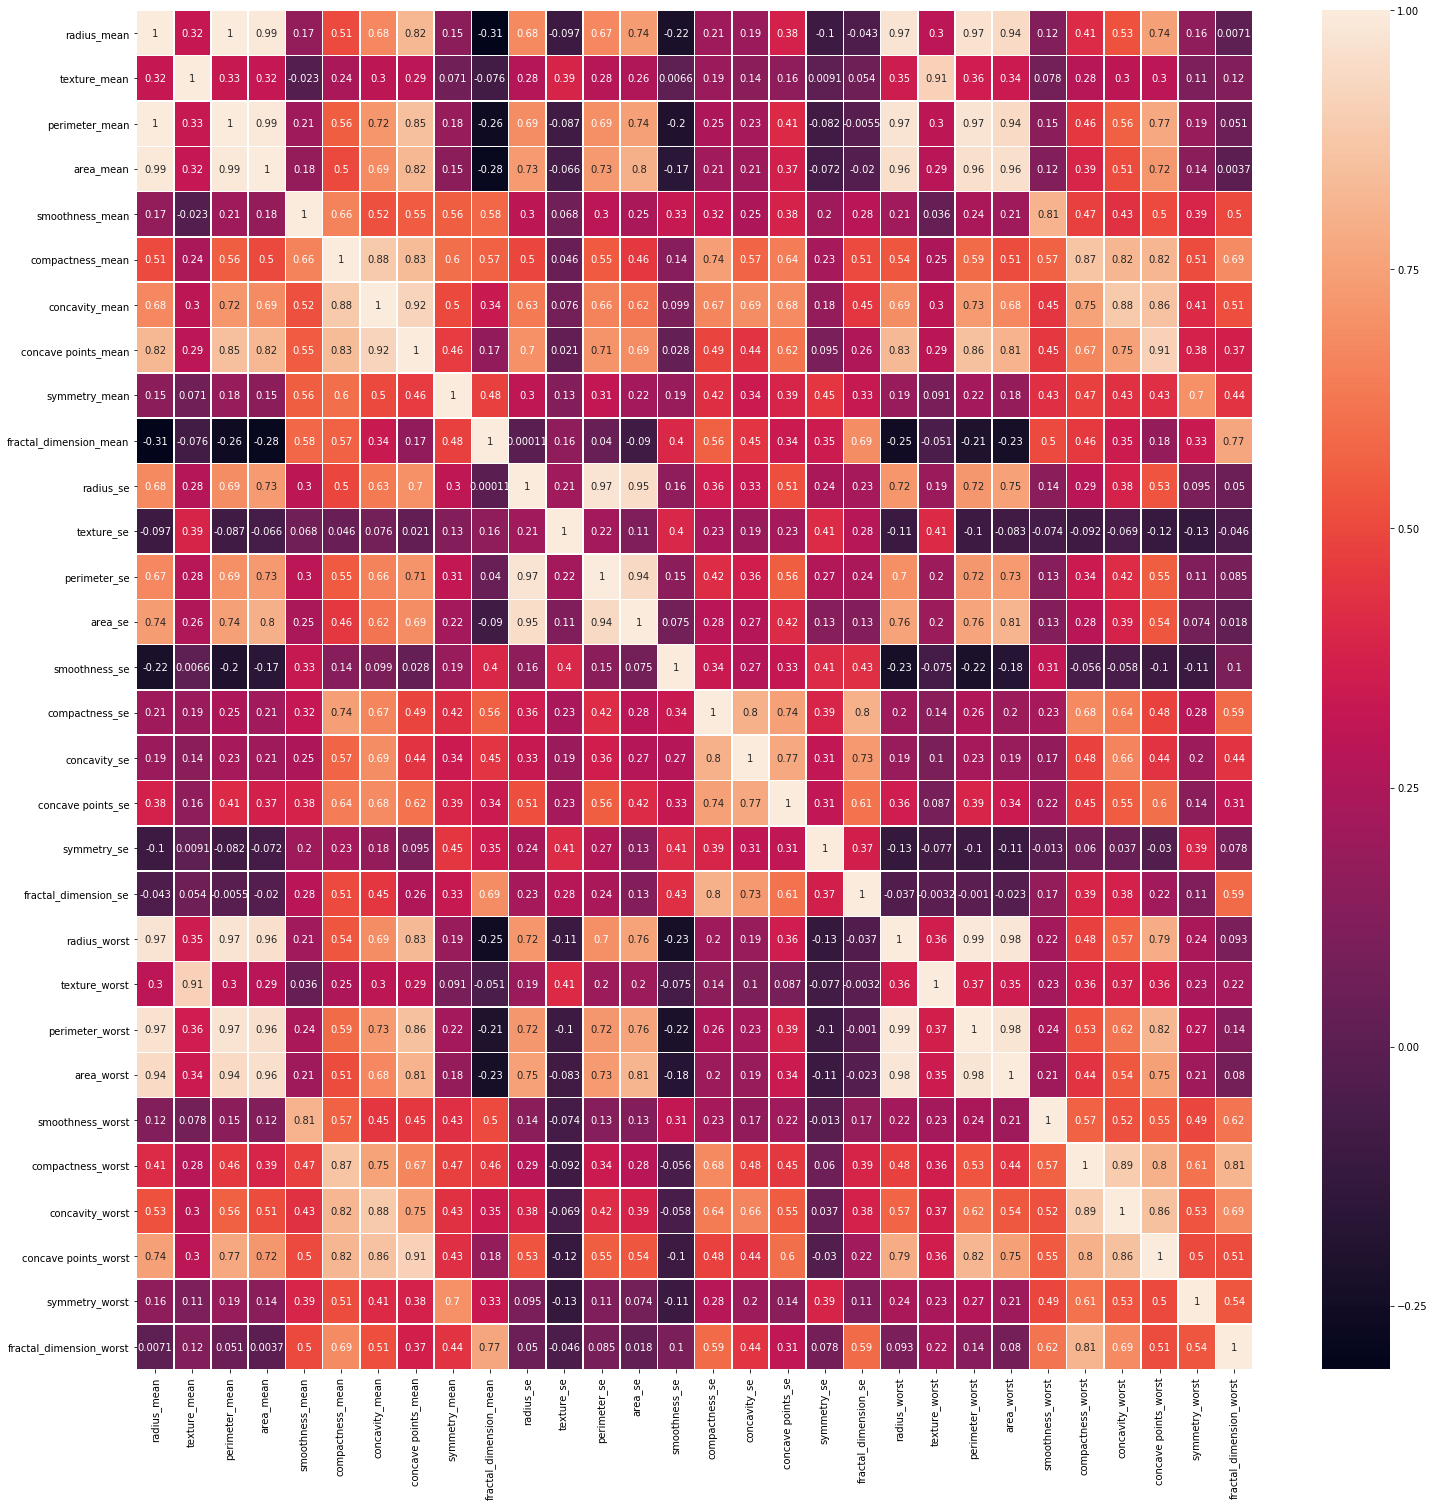

In [10]:
import numpy
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(x.corr(), annot=True, linewidths=.5,ax=ax)

Amongst the highly correlated features, we eliminate some features.
This could be done in the following way-
if there are two features let's say X1 and X2 which are highly correlated then we eliminate one of them.

In [11]:
drop_list=['perimeter_mean','area_mean','radius_worst','area_se','concave points_mean',
           'compactness_mean','area_worst','compactness_se','concave points_worst',
           'compactness_worst','perimeter_worst','texture_mean','concavity_worst','perimeter_se']
           

In [12]:
x1=x.drop(drop_list,axis=1)
x1.head()


,radius_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.4601,0.11890
1,20.57,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.2750,0.08902
2,19.69,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.3613,0.08758
3,11.42,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.6638,0.17300
4,20.29,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2364,0.07678


In [13]:
x1.shape

(569, 16)

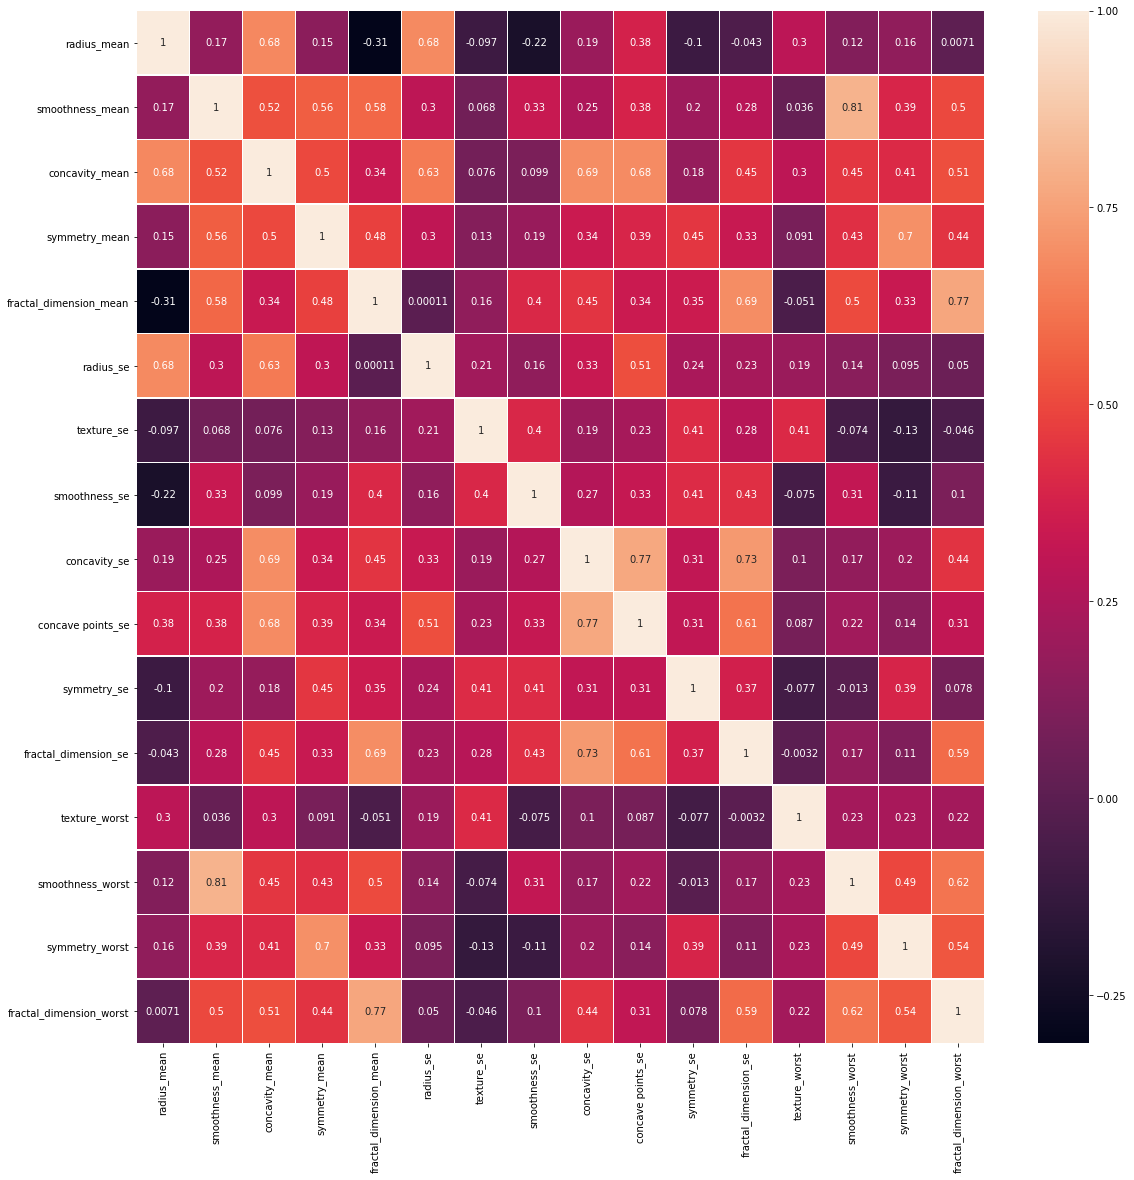

In [14]:
f,ax = plt.subplots(figsize=(19, 19))
sns.heatmap(x1.corr(), annot=True, linewidths=.5,ax=ax)

Importing various libraries for splitting the dataset and classification

In [15]:
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score

Using tts and cvs in random forest classifier and then doing the same with gradient descent

In [16]:
x_train, x_test, y_train, y_test =tts(x1, y, test_size=0.3, random_state=42)
clf_rf=rfc(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)
clf_rf.score(x_test,y_test)

0.95321637426900585

In [17]:
print(cvs(clf_rf,x1,y,cv=10,scoring="accuracy",).mean())


0.943884495722


In [18]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
clf_gb=gbc(n_estimators=54,random_state=1)
clf_gb=clf_gb.fit(x_train,y_train)
clf_gb.score(x_test,y_test)

0.95906432748538006

In [19]:
print(cvs(clf_gb,x1,y,scoring="accuracy").mean())

0.954302422723


We'll now concentrate on finding out the most informative features so that those features could only be used.
So, we use SelectKBest with chi2

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [21]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [  1.77946492e+02   1.00015175e-01   1.30547650e+01   1.95982847e-01
   3.42575072e-04   2.45882967e+01   4.07131026e-02   1.32470372e-03
   6.92896719e-01   2.01587194e-01   1.39557806e-03   2.65927071e-03
   1.16958562e+02   2.63226314e-01   1.00635138e+00   1.23087347e-01]
Feature list: Index(['radius_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [22]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
clf_rf_2 = rfc()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
clf_rf_2.score(x_train_2,y_train)

0.99748743718592969

Now we'll use recursive feature elimination using cross-validation.

In [23]:
from sklearn.feature_selection import RFECV

clf_rf_4 = rfc() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['radius_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Eventually, we can use feature ranking with random forest

Feature ranking:
1. feature 0 (0.335950)
2. feature 2 (0.166879)
3. feature 5 (0.086117)
4. feature 14 (0.075912)
5. feature 9 (0.072533)
6. feature 12 (0.052607)
7. feature 13 (0.034699)
8. feature 15 (0.032714)
9. feature 8 (0.030152)
10. feature 6 (0.021350)
11. feature 10 (0.020140)
12. feature 4 (0.019002)
13. feature 1 (0.017428)
14. feature 11 (0.014729)
15. feature 3 (0.010282)
16. feature 7 (0.009506)


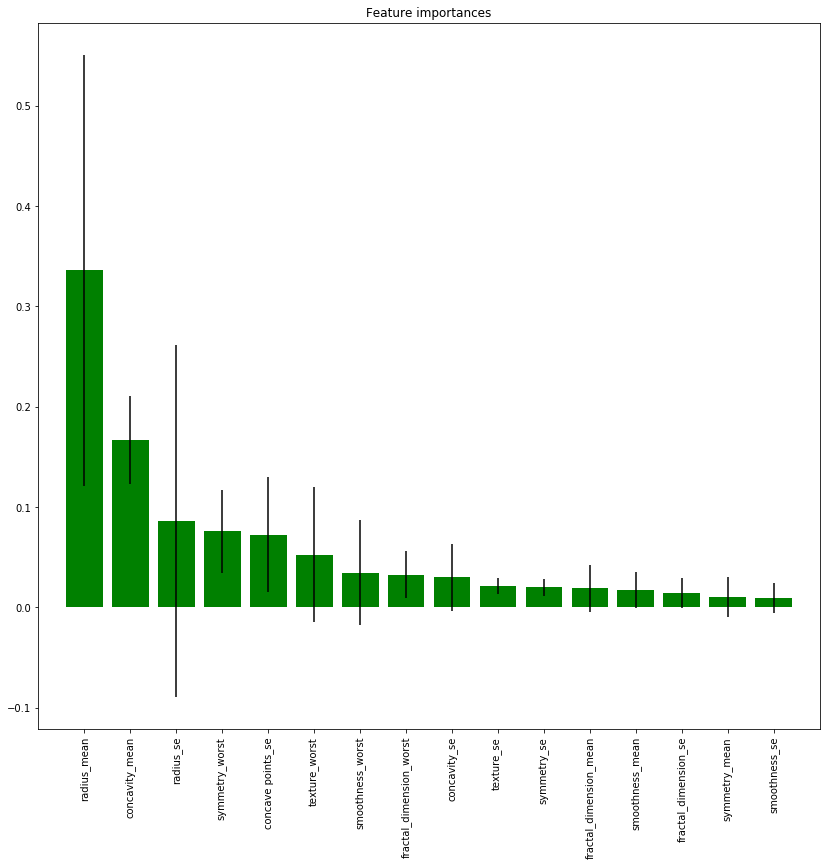

In [24]:
clf_rf_5 = rfc()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Summary:

By doing the above operations we can find out the best features for the above data set and the best predictive model could also be found out.
